In [ ]:
!!pip install -q MOABB

In [ ]:
!pip install pywd

In [87]:
import numpy as np
import scipy.signal
import scipy.io as sio
import matplotlib
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import mne
from pywt import wavedec 

import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import svm


In [370]:
import moabb
from moabb.datasets import EPFLP300, utils
from moabb.evaluations import CrossSessionEvaluation
from moabb.paradigms import LeftRightImagery
from moabb.pipelines.features import LogVariance
from mne.filter import construct_iir_filter
moabb.set_log_level("info")


import math
from sklearn.metrics import confusion_matrix

In [89]:
dataset=EPFLP300()

In [90]:
def getData(subjectNumbers,dataset=EPFLP300()):
  return dataset.get_data(subjectNumbers)

In [91]:
def getSubjectData(subjectNumber,session_number,run_number):
  session = f'session_{session_number}'
  run = f'run_{run_number}'
  return getData([subjectNumber])[subjectNumber][session][run]

**Necessary Information**:


*   We have data of 8 subjects. (from 1 to 9, 5 is excluded).
*   Each subject has data of 4 recording sessions.
*   Each session has 6 runs.
*   Each run is a recording of raw EEG signals in a duration of ~ 60 s.






In [341]:
data= getSubjectData(1,1,2)

In [342]:
data.to_data_frame()

time          Fp1           AF3            F7            F3  \
0        0.000000  3316.546875  27753.171875 -10176.140625  20151.265625   
1        0.000488  3315.968750  27752.437500 -10177.875000  20152.468750   
2        0.000977  3316.781250  27753.343750 -10177.250000  20153.718750   
3        0.001465  3317.843750  27755.750000 -10175.625000  20155.125000   
4        0.001953  3314.734375  27753.921875 -10178.703125  20153.703125   
...           ...          ...           ...           ...           ...   
108538  52.997070  3113.375000  27905.906250 -10241.281250  20333.625000   
108539  52.997559  3118.625000  27912.562500 -10231.718750  20339.562500   
108540  52.998047  3122.671875  27915.015625 -10225.265625  20341.984375   
108541  52.998535  3124.875000  27917.968750 -10221.281250  20344.375000   
108542  52.999023  3126.250000  27921.250000 -10220.281250  20347.562500   

                FC1         FC5            T7           C3           CP1  ...  \
0       1058.828125  199.390625  -9028.859375  2934.171875 -13486.109375  ...   
1       1059.343750  201.250000  -9028.406250  2935.312500 -13486.312500  ...   
2       1058.625000  204.187500  -9028.125000  2936.281250 -13486.218750  ...   
3       1060.750000  207.968750  -9026.312500  2937.593750 -13483.781250  ...   
4       1058.859375  207.296875  -9029.171875  2934.015625 -13486.828125  ...   
...             ...         ...           ...          ...           ...  ...   
108538   648.000000  695.343750 -10490.687500  2581.093750 -13860.312500  ...   
108539   655.500000  700.750000 -10482.625000  2587.093750 -13854.406250  ...   
108540   659.234375  700.828125 -10477.421875  2589.078125 -13850.640625  ...   
108541   661.031250  700.531250 -10475.468750  2592.562500 -13846.062500  ...   
108542   664.187500  698.468750 -10475.281250  2594.281250 -13846.062500  ...   

                FC2           F4            F8          AF4           Fp2  \
0       6319.703125 -4055.171875 -18351.046875  3962.765625  23307.703125   
1       6319.187500 -4054.531250 -18350.781250  3961.062500  23307.000000   
2       6319.937500 -4054.593750 -18349.437500  3962.250000  23308.125000   
3       6321.656250 -4052.218750 -18348.718750  3964.968750  23309.906250   
4       6319.546875 -4055.671875 -18352.453125  3959.734375  23307.578125   
...             ...          ...           ...          ...           ...   
108538  5967.062500 -4845.062500 -18090.281250  3526.343750  23437.187500   
108539  5974.625000 -4838.000000 -18085.062500  3530.625000  23444.437500   
108540  5978.421875 -4833.328125 -18081.765625  3535.390625  23448.296875   
108541  5983.062500 -4829.000000 -18077.437500  3538.781250  23451.781250   
108542  5985.812500 -4825.031250 -18074.968750  3539.062500  23455.406250   

                 Fz           Cz       MA1       MA2  STI  
0       5552.828125  8215.421875  0.006227 -0.006227  0.0  
1       5551.625000  8214.500000  0.006224 -0.006224  0.0  
2       5551.312500  8214.781250  0.006221 -0.006221  0.0  
3       5550.718750  8216.500000  0.006222 -0.006222  0.0  
4       5547.734375  8213.921875  0.006223 -0.006223  0.0  
...             ...          ...       ...       ...  ...  
108538  4869.718750  8191.875000  0.006235 -0.006235  0.0  
108539  4875.750000  8198.718750  0.006239 -0.006239  0.0  
108540  4879.421875  8202.015625  0.006242 -0.006242  0.0  
108541  4882.656250  8205.437500  0.006243 -0.006243  0.0  
108542  4883.718750  8209.062500  0.006244 -0.006244  0.0  

[108543 rows x 36 columns]

Since we are dealing with MNE library, it prodives the data in form of **RawArray**.

The dimension of the RawArray is (num_Channels x num_Samples).

In [343]:
data.get_data

<bound method get_data of <RawArray | 35 x 108543 (53.0 s), ~29.0 MB, data loaded>>

**Necessary Information about the structure of a single run**:

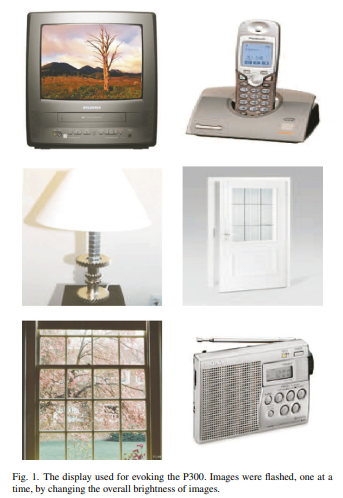

*   We essentially have 6 runs inside a session because we have 6 images in our paradigm. So each run is essentially dedicated for one image.
*   For a single run, the subject is asked to focus on one image.
*   For a single run, the images on the grid were flashed in random sequence. The sequence of flashes was block-randomized, this means that after six flashes each image was flashed once, after twelve flashes each image was flashed twice, etc. 
*   The number of blocks was chosen randomly between 20 and 25. On average 22.5 (23) blocks of six flashes were displayed in one run.
*   knowing that the subject only focuses on one image in a single run, and we have ~23 block of flashes, thus we have 23 target signals and 23x5 = 115 non-target signals inside single run.
*   Each flash of an images lasts for 400 ms, The images only flash in the first 100 ms, and remains not flashed for the remaining 300 ms.
*   knowing that we have ~23 block of flashes in a single run, where each block consists of 6 flashes (one for each image), so we have 23x6 = 138 flashes inside the run. and knowing that each flash has a duration of 400 ms, so the run lasts for 138x0.4 = 55.2 seconds.



Count of Stimulus in samples (i.e. count of target segments & non-target).

Target has value of 2 and Non-Target hase value of 1 in STI column of the dataset. 

**Note**: the rest of EEG recording in the dataframe has values of 0, meaning that it's neither target nor non-target.

In [344]:
df=data.to_data_frame()
df.STI.value_counts()

0.0    108411
1.0       110
2.0        22
Name: STI, dtype: int64

to Get index of First flash (Stimulus)

In [345]:
df.STI.ne(0).idxmax()

819

In [346]:
df.iloc[819]

time        0.399902
Fp1      3328.312500
AF3     27783.406250
F7     -10150.718750
F3      20180.312500
FC1      1091.687500
FC5       218.812500
T7      -9003.937500
C3       2941.031250
CP1    -13475.156250
CP5    -12517.750000
P7       1107.437500
P3      -6947.781250
Pz      10481.000000
PO3     -3456.750000
O1       -334.875000
Oz       -424.156250
O2        872.343750
PO4     -7620.500000
P4      -6183.968750
P8      -7528.875000
CP6     -6005.562500
CP2     -5770.468750
C4       7649.968750
T8       9276.406250
FC6     -5270.093750
FC2      6337.281250
F4      -4022.687500
F8     -18288.281250
AF4      3971.781250
Fp2     23336.687500
Fz       5577.406250
Cz       8230.750000
MA1         0.006242
MA2        -0.006242
STI         1.000000
Name: 819, dtype: float64

Get Sample indicies of Target stimulus (flash)

In [347]:
Target = df[df['STI']==2].index.values
val = np.full(len(Target),2)
target = pd.DataFrame(Target)
target["value"]=val
target

0  value
0     3280      2
1     9023      2
2    10663      2
3    18046      2
4    22148      2
5    27891      2
6    31172      2
7    37736      2
8    41017      2
9    46759      2
10   53323      2
11   56604      2
12   62367      2
13   65648      2
14   73033      2
15   74673      2
16   81235      2
17   84518      2
18   89440      2
19   97644      2
20  100106      2
21  108308      2

Get Sample indicies of Non-Target stimulus (flash)

In [349]:
nonTarget = df[df['STI']==1].index.values
value = np.full(len(nonTarget),1)
nontarget= pd.DataFrame(nonTarget)
nontarget["value"]=value
nontarget

0  value
0       819      1
1      1638      1
2      2459      1
3      4099      1
4      4921      1
..      ...    ...
105  104206      1
106  105027      1
107  105910      1
108  106667      1
109  107489      1

[110 rows x 2 columns]

Combine both target and non-target dataframes and sort (based on time) target and non-target samples.

In [350]:
df2 = nontarget.append(target,ignore_index=True) 
TargetNnonTarget = df2.sort_values(by=[0],ignore_index=True)
TargetNnonTarget

0  value
0       819      1
1      1638      1
2      2459      1
3      3280      2
4      4099      1
..      ...    ...
127  105027      1
128  105910      1
129  106667      1
130  107489      1
131  108308      2

[132 rows x 2 columns]

**Displaying single Segment**

In [351]:
segment = df.iloc[1638:1638+2048]

In [352]:
segment

time          Fp1           AF3            F7            F3  \
1638  0.799805  3348.796875  27806.484375 -10117.578125  20206.203125   
1639  0.800293  3344.187500  27802.031250 -10123.406250  20201.437500   
1640  0.800781  3342.500000  27799.375000 -10122.718750  20198.187500   
1641  0.801270  3337.234375  27797.734375 -10115.390625  20193.765625   
1642  0.801758  3334.546875  27794.734375 -10108.515625  20189.828125   
...        ...          ...           ...           ...           ...   
3681  1.797363  3326.000000  27791.187500 -10184.000000  20200.906250   
3682  1.797852  3330.968750  27795.437500 -10182.031250  20207.500000   
3683  1.798340  3332.078125  27795.671875 -10183.984375  20207.328125   
3684  1.798828  3324.875000  27790.812500 -10189.906250  20201.500000   
3685  1.799316  3318.812500  27786.468750 -10194.906250  20195.781250   

              FC1         FC5           T7           C3           CP1  ...  \
1638  1109.265625  261.921875 -8998.484375  2965.796875 -13421.890625  ...   
1639  1106.250000  250.781250 -9002.000000  2962.750000 -13425.906250  ...   
1640  1101.093750  238.875000 -9002.375000  2959.000000 -13427.093750  ...   
1641  1095.984375  228.921875 -9003.359375  2953.765625 -13430.609375  ...   
1642  1090.671875  222.296875 -9003.296875  2948.984375 -13432.890625  ...   
...           ...         ...          ...          ...           ...  ...   
3681  1081.531250  292.875000 -9036.031250  2948.968750 -13444.843750  ...   
3682  1090.218750  301.406250 -9032.656250  2954.656250 -13441.312500  ...   
3683  1090.703125  304.984375 -9031.328125  2957.171875 -13440.390625  ...   
3684  1084.031250  299.906250 -9035.250000  2951.562500 -13445.718750  ...   
3685  1078.125000  290.656250 -9039.625000  2946.250000 -13451.062500  ...   

              FC2           F4            F8          AF4           Fp2  \
1638  6369.078125 -3994.609375 -18274.109375  4001.234375  23360.953125   
1639  6363.093750 -4000.656250 -18280.781250  3996.156250  23356.156250   
1640  6360.875000 -4002.875000 -18283.250000  3993.687500  23354.562500   
1641  6357.484375 -4005.671875 -18286.546875  3989.515625  23349.953125   
1642  6354.765625 -4008.421875 -18289.890625  3987.953125  23346.171875   
...           ...          ...           ...          ...           ...   
3681  6317.343750 -4015.031250 -18291.218750  3955.468750  23333.125000   
3682  6321.312500 -4009.656250 -18287.562500  3959.468750  23340.000000   
3683  6320.953125 -4008.484375 -18290.140625  3961.859375  23339.328125   
3684  6314.156250 -4015.312500 -18297.906250  3955.250000  23331.500000   
3685  6309.375000 -4021.062500 -18305.125000  3947.906250  23325.093750   

               Fz           Cz       MA1       MA2  STI  
1638  5601.203125  8264.015625  0.006229 -0.006229  1.0  
1639  5595.500000  8260.312500  0.006229 -0.006229  0.0  
1640  5592.562500  8259.750000  0.006229 -0.006229  0.0  
1641  5588.578125  8256.859375  0.006228 -0.006228  0.0  
1642  5586.203125  8254.421875  0.006223 -0.006223  0.0  
...           ...          ...       ...       ...  ...  
3681  5574.187500  8238.000000  0.006283 -0.006283  0.0  
3682  5579.187500  8242.593750  0.006289 -0.006289  0.0  
3683  5579.078125  8242.015625  0.006286 -0.006286  0.0  
3684  5571.000000  8235.906250  0.006280 -0.006280  0.0  
3685  5566.187500  8230.468750  0.006276 -0.006276  0.0  

[2048 rows x 36 columns]

**Cropping Segment out of RawArray & plotting it.**

In [353]:
d = data.copy()
segment.reset_index(inplace=True)
tmax= segment['time'][len(segment)-1]
tmin= segment['time'][0]

In [354]:
seg=d.crop(tmin=tmin, tmax=tmax)

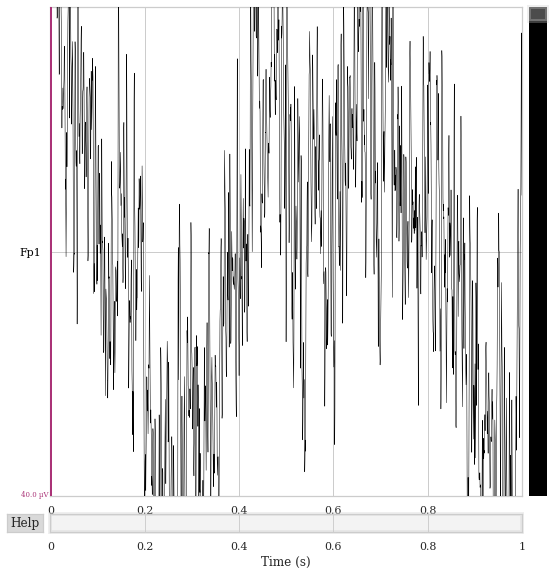

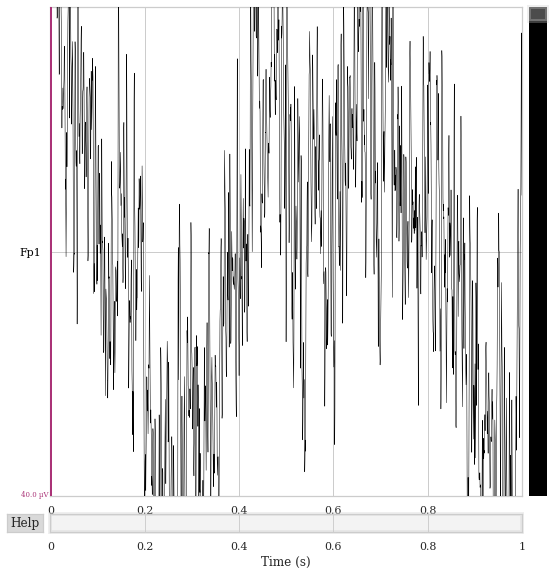

In [355]:
seg.plot(n_channels=1)

Applying Preprocessing steps on a segment and plot it. Ths steps are:


*   Filtering, bandpass butterworth filter (1-12 hz). 
*   Resampling to 32hz.
*   Scaling to (-1,1).



In [356]:
def filterAndResampleData(data,seglen,lp=12,hp=1,sf=2048,resample=32):
  iir_params = dict(order=4, ftype='butter', output='sos')  
  iir_params = construct_iir_filter(iir_params, [hp,lp], None, sf, 'bandpass', return_copy=False)
  data.filter(method='iir',iir_params=iir_params,h_freq=hp,l_freq=lp)
  return data.resample(math.ceil(((sf*32)/seglen)))

In [357]:
filtered = filterAndResampleData(seg,2048)

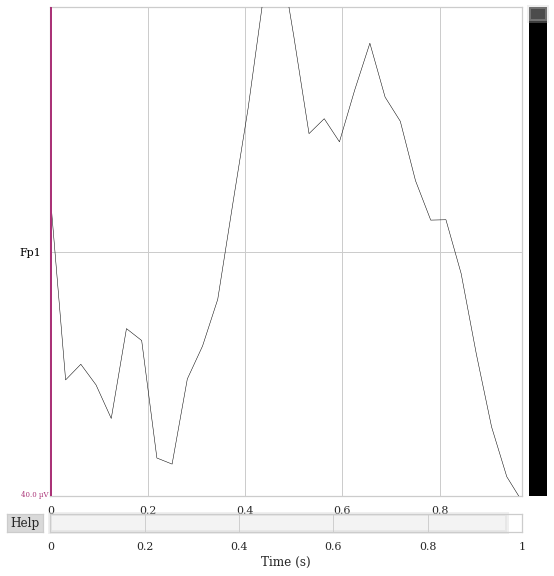

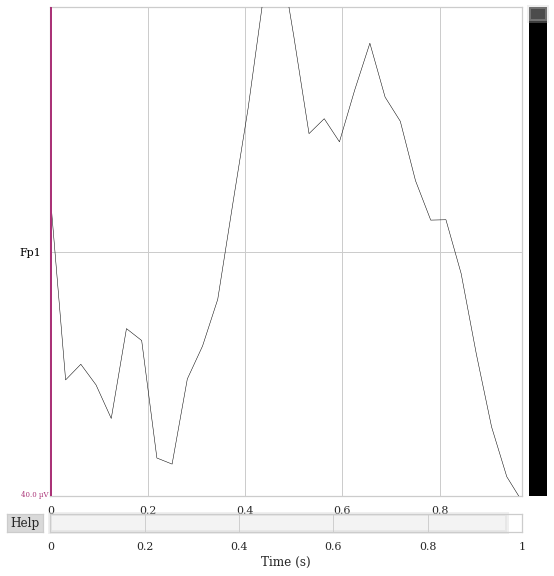

In [358]:
filtered.plot(n_channels=1)

In [359]:
filtered.to_data_frame()

time        Fp1        AF3         F7         F3        FC1        FC5  \
0   0.00000   0.047157   0.072182   0.706882  -0.053740   0.053783  -0.723678   
1   0.03125 -14.916303 -12.772545 -40.920632 -10.985045 -13.973217  -4.856563   
2   0.06250 -13.636871 -10.064415 -30.408699  -7.354167 -12.226369  -1.807094   
3   0.09375 -15.325464 -12.046944 -30.245409  -9.872017 -20.929015  -3.812052   
4   0.12500 -18.066431 -17.128757 -34.429455 -15.632085 -22.196360 -10.754161   
5   0.15625 -10.725624 -10.874214 -31.070064 -11.444440 -12.022939  -9.276203   
6   0.18750 -11.699024 -14.035085 -27.885651 -14.271408 -15.623211 -12.543368   
7   0.21875 -21.297439 -24.004075 -31.059880 -23.211060 -26.855315 -17.928712   
8   0.25000 -21.794514 -22.702551 -25.301263 -21.858264 -29.444805 -19.873999   
9   0.28125 -14.842020 -13.432380 -17.138009 -10.871623 -14.633539  -7.443699   
10  0.31250 -12.152799 -11.043305 -12.410376 -10.444279  -4.182578  -7.418728   
11  0.34375  -8.331446  -6.901150 -11.072189  -8.245801  -0.377749  -2.497622   
12  0.37500  -0.444602   1.897645  -5.054093   0.857007   0.202001   5.401532   
13  0.40625   7.304998   7.766009   6.780176   6.444491   3.600867   4.795457   
14  0.43750  16.352562  16.333585  12.394004  17.424770  18.622030  19.039578   
15  0.46875  20.622875  18.048340  16.622897  19.057534  22.065853  24.820358   
16  0.50000  13.155745  10.152040  17.311359  10.048306  10.910726  13.274970   
17  0.53125   5.205052   4.846008  10.839942   5.854700   5.087138   8.609631   
18  0.56250   6.422868   6.616860  13.103751   7.846641  10.737857   6.777313   
19  0.59375   4.534801   4.403461   7.816853   5.803825  10.086115   4.799055   
20  0.62500   8.753536  10.703355   9.889998  13.054503  12.754242  12.118263   
21  0.65625  12.592013  13.554654  11.247768  14.925964  13.738882  12.228559   
22  0.68750   8.191143   6.084943   2.473450   4.806898   4.503409   3.400466   
23  0.71875   6.214266   3.856633   8.280761   1.221026   1.790916  -2.471837   
24  0.75000   1.358813  -0.212735   6.308270  -2.147835   2.527937  -2.439404   
25  0.78125  -1.861885  -2.217882   9.306692  -4.002364  -0.984825  -5.170804   
26  0.81250  -1.830759  -0.016604  10.996175  -1.068298  -5.459637  -7.408023   
27  0.84375  -6.228765  -4.392764   9.410655  -7.443909 -14.706914 -21.882842   
28  0.87500 -12.811261 -11.153484   7.074496 -14.183090 -17.082323 -30.650352   
29  0.90625 -18.754096 -17.374528  -0.959808 -19.211140 -18.822124 -33.459365   
30  0.93750 -22.825600 -20.595766  -6.715447 -24.264881 -23.175252 -41.459805   
31  0.96875 -24.834209 -20.436561  -2.062225 -25.618571 -22.898752 -48.832133   

           T7         C3        CP1  ...        FC2         F4         F8  \
0    0.588249  -0.005414   0.684366  ...   0.162233  -0.103049  -0.473203   
1  -14.425429 -13.423716   1.264800  ... -18.184911  -9.336537  -7.802685   
2  -10.251482  -7.289671  10.520013  ... -22.960841 -23.176833 -21.704919   
3   -8.517429 -10.803113  -1.759738  ... -31.993648 -32.576038 -21.025923   
4   -4.485750 -12.797110 -14.775846  ... -27.265936 -26.667173  -4.962626   
5    4.093776  -7.802441 -17.062499  ... -13.435295 -11.423570   5.408335   
6    1.804533 -15.071004 -28.815153  ... -13.792626  -6.706613   2.342592   
7   -8.424204 -24.541490 -38.357976  ... -28.898925 -22.363633  -5.864022   
8   -9.617872 -23.987070 -31.634020  ... -32.500158 -25.257189 -14.711404   
9   -7.700547 -11.692237 -19.976164  ... -19.487014 -16.535268 -20.149513   
10 -13.272455  -5.831595 -20.247799  ... -10.048855 -13.851946 -12.450321   
11  -9.086231  -2.478884  -9.933580  ...  -1.037902  -2.173006   1.968646   
12  -4.468863   2.072137   2.181480  ...   0.667873   3.962628   8.953732   
13  -5.103737   7.005982  10.749180  ...   0.908469   1.263059   2.632793   
14   2.271306  18.835404  26.574143  ...  16.502595  14.680492   7.846660   
15   9.203536  21.827437  28.439543  ...  32.121379  31.619980  22.835244   
16   7.197874  10.045278

In [361]:
def getTargetData(df):
  Target = df[df['STI']==2].index.values
  val = np.full(len(Target),2)
  targetDF= pd.DataFrame(Target)
  targetDF["value"]=val
  return targetDF

In [362]:
def getNonTargetData(df):
  nonTarget = df[df['STI']==1].index.values
  value = np.full(len(nonTarget),1)
  nontargetDF= pd.DataFrame(nonTarget)
  nontargetDF["value"]=value
  return nontargetDF

In [363]:
def getTottalData(df):
  targetDF = getTargetData(df)
  nontargetDF = getNonTargetData(df)
  totaldf = nontargetDF.append(targetDF,ignore_index=True) 
  TargetNnonTarget = totaldf.sort_values(by=[0],ignore_index=True)
  return TargetNnonTarget

We extract **one feature vector** out of each single segment inside a run.
So we end up with pairs of (feature vectors, label). Label is either target or non-target.

In [364]:
def scaleAndExtractFeatures(segment,runNum,segindx):
  scaler = MinMaxScaler(feature_range = (-1,1))
  df = segment.to_data_frame()
  columns = ['time', 'MA1', 'MA2' , 'STI']
  df.drop(columns,axis=1,inplace=True)
  featureVector = []
  for val in df.columns.values:
    vals=df[val].values.reshape(-1, 1)
    scaled = scaler.fit_transform(vals)
    # print("rum number: ",runNum,"\nsegment number",segindx)
    col= scaled.reshape(32,)
    cA2, cD2, cD1 = wavedec(col,'db1',level=2)
    featureVector.extend(cA2)
    featureVector.extend(cD2)
    featureVector.extend(cD1)
  return featureVector

In [365]:
def divideSingleRun(df, data,runNum):
  TargetNnonTarget= getTottalData(df)
  segments=[]
  output=[]
  length=len(TargetNnonTarget)
  for index, row in TargetNnonTarget.iterrows():
    if(index==length-1):
      Segment = df.iloc[TargetNnonTarget[0].iloc[index]:]
    else:
      Segment = df.iloc[TargetNnonTarget[0].iloc[index]:TargetNnonTarget[0].iloc[index]+2048]

    # crop segment from RawArray
    d = data.copy()
    Segment.reset_index(inplace=True)
    tmax= Segment['time'][len(Segment)-1]
    tmin= Segment['time'][0]
    seg=d.crop(tmin=tmin, tmax=tmax)

    # Filter and resample
    filtered = filterAndResampleData(seg,len(Segment))

    # Scale and extract features
    if(len(filtered.to_data_frame())!=32):
      continue
    featureVector= scaleAndExtractFeatures(filtered,runNum,index)

    segments.append(featureVector)
    output.append(TargetNnonTarget['value'].iloc[index])
  return segments, output

In [366]:
def prepareSubjectDataForSVM(subjectNumber):
  x_train=[]
  y_train=[]
  for sessionNumber in range(1,4):
    for runNumber in range(1,7):
      data=getSubjectData(subjectNumber,sessionNumber,runNumber)
      df=data.to_data_frame()
      segments, target = divideSingleRun(df, data, runNumber)
      x_train+=segments
      y_train+=target
    print("   session Number ",sessionNumber , " completed.......")
  x_test =[]
  y_test =[]
  for runNumber in range(1,7):
      data=getSubjectData(subjectNumber,4,runNumber)
      df=data.to_data_frame()
      segments, target = divideSingleRun(df, data,runNumber)
      x_test+=segments
      y_test+=target
  return x_train,y_train, x_test ,y_test

In [373]:
def SVM(subjectNumber):
  print("preparing Subject ",subjectNumber , " Data.......")
  x_train,y_train, x_test ,y_test=prepareSubjectDataForSVM(subjectNumber)
  clf = svm.SVC()
  clf.fit(x_train,y_train)
  preditions =clf.predict(x_test)
  print(subjectNumber , "accuracy score " , accuracy_score(preditions , y_test))
  
 
  cm = confusion_matrix(y_test,preditions,labels=[2,1])
  print(cm)
  print("______________________________________________")

In [374]:
SVM(1)

preparing Subject  1  Data.......
   session Number  1  completed.......
   session Number  2  completed.......
   session Number  3  completed.......
1 accuracy score  0.8512195121951219
[[ 17 118]
 [  4 681]]
______________________________________________


In [319]:
SVM(7)

preparing Subject  7  Data.......


100%|████████████████████████████████████████| 283M/283M [00:00<00:00, 159GB/s]
SHA256 hash of downloaded file: 18595cbdc93bed4b12b9e1d76f8161c753bfb8546a7885ba5be4cd9417282df1
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


unzip /root/mne_data/MNE-epflp300-data/groups/m/mm/mmspg/www/BCI/p300/subject7.zip
   session Number  1  completed.......
   session Number  2  completed.......
   session Number  3  completed.......
7 accuracy score  0.8599766627771295
______________________________________________


In [321]:
SVM(4)

preparing Subject  4  Data.......


100%|████████████████████████████████████████| 280M/280M [00:00<00:00, 180GB/s]
SHA256 hash of downloaded file: 6c43a64ae0e6286e1d48c9acbdfc47a1b1938ceaede3bb0b9ffe6ba663b4bc5e
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


unzip /root/mne_data/MNE-epflp300-data/groups/m/mm/mmspg/www/BCI/p300/subject4.zip
   session Number  1  completed.......
   session Number  2  completed.......
   session Number  3  completed.......
4 accuracy score  0.8341346153846154
______________________________________________


In [320]:
SVM(8)

preparing Subject  8  Data.......


100%|████████████████████████████████████████| 266M/266M [00:00<00:00, 113GB/s]
SHA256 hash of downloaded file: 020ceea17f16f1c67729a3e2ba0b6b1f86b79b3161e2ba1e6a986d615b048af4
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


unzip /root/mne_data/MNE-epflp300-data/groups/m/mm/mmspg/www/BCI/p300/subject8.zip
   session Number  1  completed.......
   session Number  2  completed.......
   session Number  3  completed.......


<ipython-input-255-0b6f0d932841>:5: RuntimeWarning: Resampling of the stim channels caused event information to become unreliable. Consider finding events on the original data and passing the event matrix as a parameter.
  return data.resample(math.ceil(((sf*32)/seglen)))
<ipython-input-255-0b6f0d932841>:5: RuntimeWarning: Resampling of the stim channels caused event information to become unreliable. Consider finding events on the original data and passing the event matrix as a parameter.
  return data.resample(math.ceil(((sf*32)/seglen)))


8 accuracy score  0.8746898263027295
______________________________________________


In [375]:
events = mne.find_events(data, stim_channel='STI', verbose=True)

132 events found
Event IDs: [1 2]


In [376]:
events

array([[   819,      0,      1],
       [  1638,      0,      1],
       [  2459,      0,      1],
       [  3280,      0,      2],
       [  4099,      0,      1],
       [  4921,      0,      1],
       [  5740,      0,      1],
       [  6561,      0,      1],
       [  7382,      0,      1],
       [  8202,      0,      1],
       [  9023,      0,      2],
       [  9842,      0,      1],
       [ 10663,      0,      2],
       [ 11482,      0,      1],
       [ 12304,      0,      1],
       [ 13125,      0,      1],
       [ 13942,      0,      1],
       [ 14765,      0,      1],
       [ 15585,      0,      1],
       [ 16406,      0,      1],
       [ 17225,      0,      1],
       [ 18046,      0,      2],
       [ 18868,      0,      1],
       [ 19687,      0,      1],
       [ 20508,      0,      1],
       [ 21327,      0,      1],
       [ 22148,      0,      2],
       [ 22968,      0,      1],
       [ 23789,      0,      1],
       [ 24610,      0,      1],
       [ 2

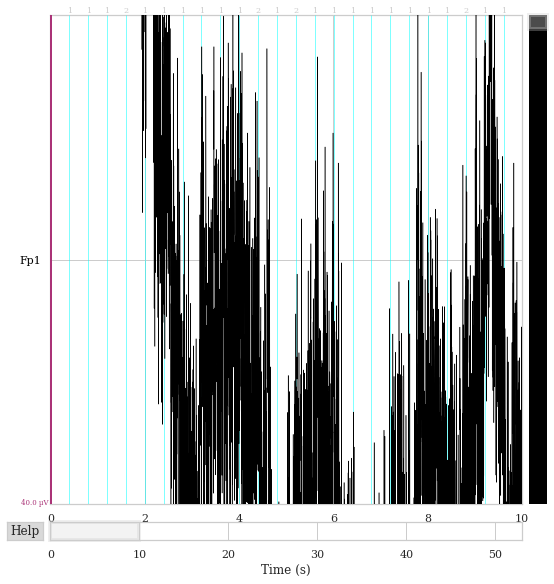

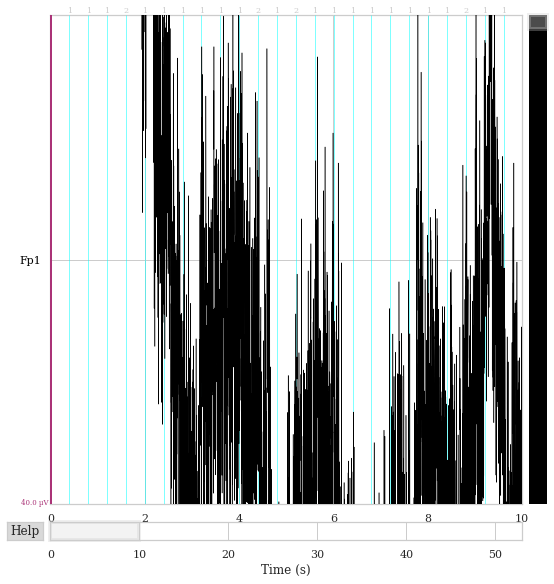

In [377]:
data.plot(events, n_channels=1)